# Student information

Full name: Lại Khánh Toàn

Student ID: 19120689

# Preparation

## Download data

In [1]:
!wget https://raw.githubusercontent.com/ptpuyen1511/sna-lab01-twitch/master/musae_twitch_de.txt

--2023-05-09 14:55:36--  https://raw.githubusercontent.com/ptpuyen1511/sna-lab01-twitch/master/musae_twitch_de.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1652993 (1.6M) [text/plain]
Saving to: ‘musae_twitch_de.txt’

musae_twitch_de.txt 100%[===================>]   1.58M  --.-KB/s    in 0.06s   

2023-05-09 14:55:36 (27.3 MB/s) - ‘musae_twitch_de.txt’ saved [1652993/1652993]



## Install necessary package

In [2]:
!pip install nxviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Lab 01

## Import necessary libraries and modules

In [24]:
import networkx as nx
import nxviz as nz
import matplotlib.pyplot as plt
import random
from random import sample

# Your import libraries
from itertools import combinations
from collections import defaultdict

## Question 1:
Create a graph from the provided file. Then make the following basic information statistics: graph type of this social network, the total number of users and the total number of friendships available in this network.

### Create graph G from file

In [4]:
G = nx.read_adjlist("/content/musae_twitch_de.txt",create_using=nx.Graph(), nodetype = int)

# G.nodes()
#YOUR CODE HERE

### The type of graph G

In [5]:
#YOUR CODE HERE
type(G)

networkx.classes.graph.Graph

### The total number of users

In [6]:
#YOUR CODE HERE
print(len(G.nodes()))

9498


### The total number of friendships

In [7]:
#YOUR CODE HERE
print(len(G.edges()))

153138


## Question 2:
Checks whether the two users are related to each other. The two users are considered to be related when and only if there is a path between the two nodes representing the two users.

### Funtion path_exists(G, node1, node2)

In [8]:
def related(G, node1, node2):
    '''
    Checks whether there exists a path between node1 and node2 in graph G

    ---Inputs:
        G:      networkx.classes.graph.Graph
                The graph contains 2 nodes that need to be checked
        node1:  str
                ID of the node1 (user1) to check
        node2:  str
                ID of the node2 (user2) to check


    ---Return:
        is_related: <bool>
                    True if there exists a path between the two nodes
                    False otherwise
        num_nodes:  <int>
                    Number of nodes node1 goes through to get to node2
                    If is_ralated == False -> num_nodes = -1
                      
    '''
        
    #YOUR CODE HERE
    
    num_nodes = 0

    vistited_nodes = set()
    queue = [node1] 

    for node in queue:
        neighbors = list(G.neighbors(node))
        if node2 in neighbors:
            return True, num_nodes
            break
        else:
            vistited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in vistited_nodes])
            num_nodes += 1
        if node == queue[-1]:
            return False, -1
            break



### Check funtion

In [9]:
related(G, 7, 15)

(True, 2)

In [10]:
related(G, 3, 452)

(False, -1)

## Question 3:
Find important users in this social network according to 2 characteristics:

1.   Degree centrality
2.   Betweenness centrality



### With degree centrality

In [11]:
# Calculate degree centralities
deg_cent = nx.degree_centrality(G)

# Find max value of degree centralities
max_dc = max(list(deg_cent.values()))

# Find user(s) who have the most friends
for k, v in deg_cent.items():
  if v == max_dc:
    most_voted_users = k

# Display user(s) who have the most friends
print('The user(s) with the most friends: ' + str(most_voted_users))
print('Degree_centrality: ' + str(max_dc))
print('The number of friends: '+ str(len(list(G.neighbors(most_voted_users)))))

The user(s) with the most friends: 7787
Degree_centrality: 0.44845740760240077
The number of friends: 4259


### With betweenness centrality

In [12]:
# DO NOT CHANGE CODE IN THIS CELL
# Create sub graph for calculating betweenness centrality
random.seed(42)
random_nodes = sample(list(G.nodes()), 1000)
subG = G.subgraph(random_nodes)

<font color='red'><ins>Note</ins>: Student MUST calculate betweenness centralities for subG</font>

In [13]:
# Calculate betweenness centralities for subG
bet_cent = nx.betweenness_centrality(subG)

# Find max value of betweenness centralities
max_bc = max(list(bet_cent.values()))

# Find user(s) who have the most friends
for k2, v2 in bet_cent.items():
  if v2 == max_bc:
    most_friends_users = k2 

# Display user(s) who have the most friends
print('The user(s) with the most friends in sub network: ' + str(most_friends_users))
print('Betweenness_centrality: ' + str(max_bc))
print('The number of friends: '+ str(len(list(subG.neighbors(most_friends_users)))))

The user(s) with the most friends in sub network: 2498
Betweenness_centrality: 0.11606447647120414
The number of friends: 100


## Question 4:
Find abritary community in this social network and visualize it.

### Function find_abritary_clique()

In [14]:
def find_abritary_clique(G):
    '''
    Find abritary community in graph G

    --- Inputs:
        - G:    networkx.classes.graph.Graph
                The graph you want to search the community

    --- Returns:
        Any one of the first 50 found communities of graph G
    '''

    #YOUR CODE HERE
    mcs = []
    for clique in list(nx.find_cliques(G)):
      if len(clique) >= 3:
        mcs.append(clique)

    random.shuffle(mcs)

    return random.choice(mcs[:50])
                   

### Find abritary clique

In [15]:
# Find abritary clique in this social network
abritary_clique = find_abritary_clique(G)
print(abritary_clique)

[2980, 8803, 2816, 2732, 4139, 2381, 3066]


### Visualize it

/usr/local/lib/python3.10/dist-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


TypeError: ignored

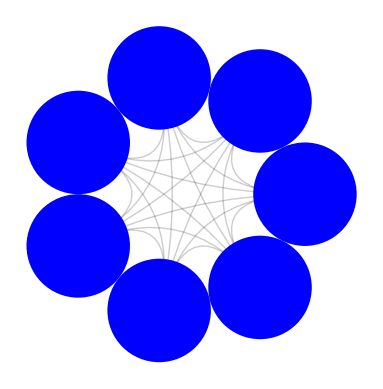

In [19]:
# Create subgraph from above abritary clique
G_ac = G.subgraph(abritary_clique) 

# Creat CircosPlot
#YOUR CODE HERE
from nxviz import CircosPlot
for n, d in G_ac.nodes(data=True):
  G_ac.nodes[n]['degree'] = nx.degree(G_ac, n)

# Visualize
#YOUR CODE HERE
c = CircosPlot(G_ac, node_order='degree')

c.draw()
plt.show()

## Question 5:
Builds a friends suggestion system for users on this social network using the concept of `open triangles`.

### Function recommended_system

In [33]:
from math import comb
def recommended_system(G, k):
    '''
    The function suggests top k pairs of users most likely to make friend.

    --- Inputs:
        - G:    networkx.classes.graph.Graph
                The graph (social network) wants to make the recommendation

        - k:    int
                Top k pairs of users who need suggestion

    --- Returns:
        topk_pairs: list [tuple(str, str)]
                    List of top k pairs of users most likely to make friend.
    '''

    #YOUR CODE HERE
    # Find all pairs of users who are not friends
    recommended = defaultdict(int)

    for n, d in G.nodes(data=True):
      for n1, n2 in combinations(G.neighbors(n), 2):
        if not G.has_edge(n1, n2):
          recommended[(n1, n2)] += 1

    all_counts = sorted(recommended.values())
    topk_pairs = [pair for pair, count in recommended.items() if count > all_counts[-k]]

    return topk_pairs


### Check funtion

In [34]:
# DO NOT CHANGE CODE IN THIS CELL
# Create sub graph for recommendation
random.seed(42)
random_nodes = sample(list(G.nodes()), 5000)
subG = G.subgraph(random_nodes)

<font color='red'><ins>Note</ins>: Student MUST create recommendation system with subG</font>

In [35]:
top3_pairs = recommended_system(subG, 3)

print('The top 3 user-pairs that can make friend each other: ')
print(top3_pairs)

The top 3 user-pairs that can make friend each other: 
[(2980, 9206), (4038, 8803)]


---
<center>THE END</center>

